In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:

data=pd.read_csv('diabetes.csv')

In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
data.shape

(768, 9)

## Minimum değerler 0 biz onları nulla çeviricez ve doldurucaz 
#### We can notice that have many zeros values. We'll convert to null values and impute it.

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [104]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [105]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                31
SkinThickness               189
Insulin                     311
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [106]:
print(data['SkinThickness'].median())

28.0


## impute işlemi yapacağım median ve meanlerle

In [107]:
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,635.0,3.025197,2.415642,0.000,1.0000,2.000000,5.000000,8.000
Glucose,635.0,119.414286,29.829295,44.000,99.0000,114.000000,136.000000,199.000
BloodPressure,635.0,71.150662,11.764600,24.000,64.0000,71.150662,78.000000,122.000
SkinThickness,635.0,27.918110,8.532342,7.000,23.0000,28.000000,31.000000,99.000
Insulin,635.0,133.898148,56.896686,15.000,115.0000,133.898148,133.898148,415.000
BMI,635.0,31.429600,5.941320,18.200,26.9500,31.429600,35.500000,45.000
DiabetesPedigreeFunction,635.0,0.461361,0.309657,0.078,0.2435,0.370000,0.606000,2.288
Age,635.0,31.792126,11.419348,21.000,23.0000,28.000000,37.000000,72.000
Outcome,635.0,0.299213,0.458274,0.000,0.0000,0.000000,1.000000,1.000


In [110]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,stratify=y)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(508, 8)
(127, 8)
(508,)
(127,)


In [115]:
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score

In [116]:
from xgboost import XGBClassifier

In [121]:
model=XGBClassifier(objective='multi:softmax',num_class=2,learning_rate=0.06)

In [122]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [123]:
predictions=model.predict(X_valid)

In [124]:
print(mean_absolute_error(y_valid,predictions))

0.25984251968503935


In [125]:
accuracy_score(y_valid,predictions)

0.7401574803149606

In [129]:
score=cross_val_score(model,X,y,cv=5)
print(score.mean())

0.7669291338582677


In [130]:
print(confusion_matrix(y_valid,predictions))

[[76 13]
 [20 18]]


C:\Users\90545\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


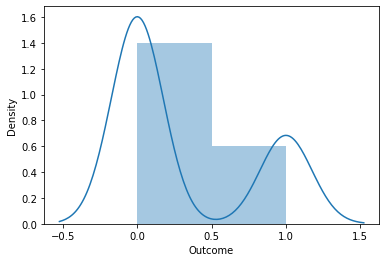

In [114]:
sns.distplot(y_valid,bins=2)
plt.show()